# ch 8.3 AdaBoost 
从网上下载或自己编程实现AdaBoost，以不剪枝决策树为基学习器，在西瓜数据集3.0α上训练一个AdaBoost集成

In [47]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
dataset = pd.read_csv('data/table_4_3_watermelon_3_0_num.csv')
dataset = dataset[['density','sugar_ratio','label']]

In [144]:
# create base learner
def train_adboost(dataset, num_base):
    base_learner = DecisionTreeClassifier()
    ada_boost = AdaBoostClassifier(base_learner, n_estimators=num_base)
    ada_boost.fit(dataset.ix[:,[0,1]], dataset.ix[:,2])
    return ada_boost

In [131]:
def print_error_weight(ada_boost):
    print('Base Learner error and weight:')
    for idx, err, weight in zip(range(1, 11), ada_boost.estimator_errors_, ada_boost.estimator_weights_):
        print('Base Learner-%d\t' % idx, err, '\t', weight)

In [162]:
def plot_boundary(dataset,ada_boost, plot_num, num_base):
    fig = plt.subplot(plot_num)
    test_density = np.array(dataset['density'])
    test_sugar_ratio = np.array(dataset['sugar_ratio'])
    x_step = (max(test_density) - min(test_density))/20
    y_step = (max(test_sugar_ratio) - min(test_sugar_ratio))/20
    test_x = np.arange(min(test_density)-5*x_step, max(test_density)+5*x_step, x_step)
    test_y = np.arange(min(test_sugar_ratio)-5*y_step, max(test_sugar_ratio)+5*y_step, y_step)
    test_data = np.transpose([np.tile(test_x, len(test_y)), np.repeat(test_y, len(test_x))])
    test_out = ada_boost.predict(test_data)
    for i in range(len(test_out)):
        if test_out[i]:
            plt.plot(test_data[i,0], test_data[i,1], 'bx', alpha=0.5)
        else:
            plt.plot(test_data[i,0], test_data[i,1], 'gx', alpha=0.5)
    dataset0 = dataset[dataset['label']==0]
    dataset1 = dataset[dataset['label']==1]
    plt.plot(list(dataset0['density']), list(dataset0['sugar_ratio']), 'g.')
    plt.plot(list(dataset1['density']), list(dataset1['sugar_ratio']), 'b.')
    plt.title('num_classifier='+str(num_base))
    plt.show()

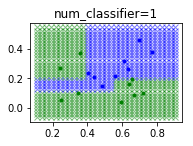

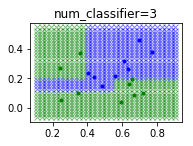

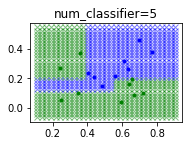

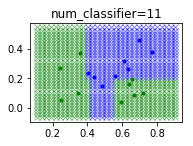

In [163]:
for i,j in zip([1,3,5,11],[221,222,223,224]):
    ada = train_adboost(dataset, num_base=i)
    plot_boundary(dataset, ada, j, i)

# 另外，发现一个打印树的包

In [46]:
from IPython.display import Image  
import pydotplus 

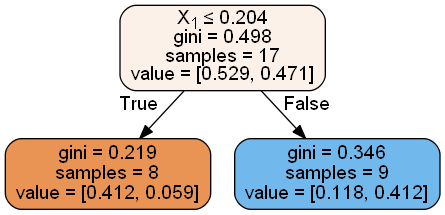

In [84]:
clf = base_learner.fit(dataset.ix[:,[0,1]], dataset.ix[:,2])
dot_data = tree.export_graphviz(ada_boost.estimators_[0], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 